Chambers, Elizabeth: Grade=90/100
1.) Missing clear lab writeup layout i.e. Abstract, theory, summary, conclusion 
2.) Chi squared not calculated quite right

# Introduction
This experiment will show how a binomial distribution (aka a coin flip)
functions, using a computer simulation. The objectives of this experiment
are to further our understanding of ipython and Jupyter, and to further our understanding of the binomial and poisson distributions.


# Methods
In order to carry out this experiment, we defined a funtion that would simulate exactly what the binomial distribution does. We then graphed said function for a certain number of trials, and compared it to the probability of success.

We then defined a function with the same parameters, except made the probability user defined, so that we could see how the probability affected our histogram. We compared the binomial and poisson distributions to this.

This applies to astronomy and photons, because either getting or not getting a photon is also a binomial distribution..that we should be able to simulate using these exact same formulas, with a different probability.

# Results and Discussion
When the probability is the normal half or 0.5 we get a very nice bell distribution, which is expected. As we decrease the probability, the curve of the histogram drastically sways left, this makes sense (and is more realistic for things such as photons), because we are much less likely to get a "success" than we are in a simple coin flip.



[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]


<Container object of 21 artists>

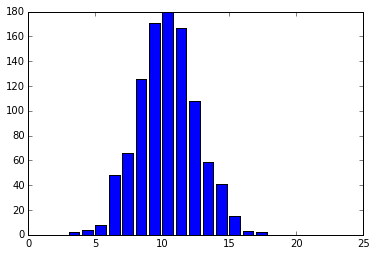

In [2]:
#1d
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

numtrials = 1000

counts = np.zeros(21)
print counts
for i in range(0,numtrials):
        draw = np.random.randint(2, size=20)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] +1
        
plt.bar(np.arange(21), counts)

# Graph 1
Above is a plot for a random coin toss of 20 coins, tossed 1000 times.

[ 0.03125  0.15625  0.3125   0.3125   0.15625  0.03125]


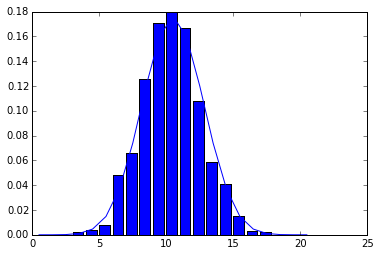

In [3]:
#1e
import scipy.misc as scm
def PNx(N):
    p = 0.5
    x = (np.arange(N+1.))
    PNx = scm.factorial(N)/((scm.factorial(x)*scm.factorial(N-x)))*((0.5)**N)
    return PNx
print PNx(5)

plt.bar(np.arange(21), counts/numtrials)
plt.plot(np.arange(21)+0.5,PNx(20))

# Graph 2
Above is the same graph (for 20 coins tossed 1000 times), with a gaussian distribution curve fitted to the graph.

In [4]:
#1f
N = 20.
x = (np.arange(N+1.))
probability = counts/(np.float(numtrials))
experimental = np.sum(x * probability)
numerical = np.sum(x * (PNx(N)))
print x
print PNx(N)
print experimental
print probability
print numerical




[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.]
[  9.53674316e-07   1.90734863e-05   1.81198120e-04   1.08718872e-03
   4.62055206e-03   1.47857666e-02   3.69644165e-02   7.39288330e-02
   1.20134354e-01   1.60179138e-01   1.76197052e-01   1.60179138e-01
   1.20134354e-01   7.39288330e-02   3.69644165e-02   1.47857666e-02
   4.62055206e-03   1.08718872e-03   1.81198120e-04   1.90734863e-05
   9.53674316e-07]
9.94
[ 0.     0.     0.     0.002  0.004  0.008  0.048  0.066  0.126  0.171
  0.18   0.167  0.108  0.059  0.041  0.015  0.003  0.002  0.     0.     0.   ]
10.0


# Problem 2

Enter Probability of Success
0.01
Enter Number of Trials
1000


<Container object of 101 artists>

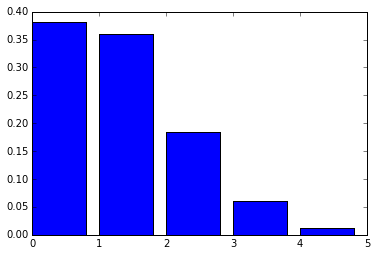

In [5]:
#AAAAAAAAAAAAAAA

def balls(N):
    N = 100.
    print "Enter Probability of Success"
    p = input()
    x = (np.arange(N+1.))
    balls = scm.factorial(N)/((scm.factorial(x)*scm.factorial(N-x)))*((p)**N)
    return balls
#print balls(5)

N = 100.
print "Enter Probability of Success"
p = input()
print "Enter Number of Trials"
trials = input()
counts = np.zeros(N+1)
for i in range(0,trials):
        draw = np.random.uniform(0,1, size=N)
        heads_count = len(draw[(np.where(draw < p))])
        tails_count = len(draw[(np.where(draw > p))])
        counts[heads_count] = counts[heads_count] +1
        
plt.xlim(0,5)
plt.bar(np.arange(N+1), counts/trials)





# Graph 3
Above shows a graph detailing the probability of "success", success being when a heads is flipped, for a probabilty of .01, with 20 coints, and 1000 trials.

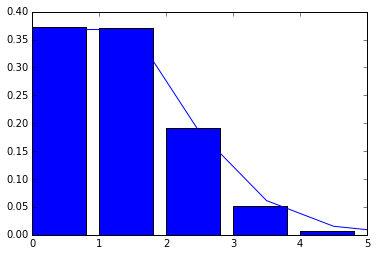

In [6]:
#BBBBBBB
def Poisson(N):
    x = (np.arange(N+1.))
    am = N*p
    Poisson = (am**x*np.exp(-am))/scm.factorial(x)
    return Poisson


counts = np.zeros(N+1)
for i in range(0,trials):
        draw = np.random.uniform(0,1, size=N)
        heads_count = len(draw[(np.where(draw < p))])
        tails_count = len(draw[(np.where(draw > p))])
        counts[heads_count] = counts[heads_count] +1
        
plt.bar(np.arange(N+1), counts/trials)
plt.xlim(0,5)
plt.plot(np.arange(N+1)+0.5,Poisson(N))
plt.plot(np.arange(N+1),PNx(N), ls = '--', color = 'c')


# Graph 4
This is the same graph, with a fitted distribution line.

In [7]:
#CCCCCCC
E_X2 = np.sum((np.arange(N+1.)**2*(counts/trials)))
EX_2 = (np.sum(np.arange(N+1.)*(counts/trials)))**2
Var = E_X2 - EX_2

E_X = np.sum((np.arange(N+1.)*(counts/trials)))


print Var
print E_X

0.956039
0.969


In [8]:
#DDDDD
from scipy.stats import chisquare
chi_sq = chisquare((counts/trials), (Poisson(N)))
print chi_sq

chi_squared = np.sum(((counts/trials)-(Poisson(N)))**2)
print chi_squared

(0.019246954399003605, 1.0)
0.000291433066779
